In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math


In [6]:
def fun(x):
    return 2*x

In [42]:
def funana(t):
    return math.exp(t*2)

In [43]:
def euler(x,dt):
    gx=fun(x)
    x=x+dt*gx
    return x

In [44]:
def rk4(x,dt):
    gx1=fun(x)
    xt=x+dt*gx1/2
    gx2=fun(xt)
    xt=x+dt*gx2/2
    gx3=fun(xt)
    xt=x+dt*gx3
    gx4=fun(xt)
    x=x+dt*(gx1+gx2*2+gx3*2+gx4)/6
    return x

In [64]:
x=1
xEuler=1
xRk4=1


df=pd.DataFrame(columns=['dt','xEuler','xRK4'])
for j in range(2,11):
    dt=math.pow(0.2,j)
    errorEuler=0
    errorRk4=0
    xEuler=1
    xRk4=1
    for i in range(int(2/dt)):
        xEuler=euler(xEuler,dt)
        xRk4=rk4(xRk4,dt)
    ana=funana(2)
    errorEuler=-xEuler+ana
    errorRk4=ana-xRk4
    df.loc[len(df)]=[dt,errorEuler,errorRk4]

df

,dt,xEuler,xRK4
0,4.000000e-02,11.170731,4.197768
1,8.000000e-03,2.534660,0.866619
2,1.600000e-03,0.520622,0.174435
3,3.200000e-04,0.104687,0.034932
4,6.400000e-05,0.020960,0.006988
5,1.280000e-05,0.004193,0.001398
6,2.560000e-06,0.000839,0.000280
7,5.120000e-07,0.000168,0.000056
8,1.024000e-07,0.000034,0.000011


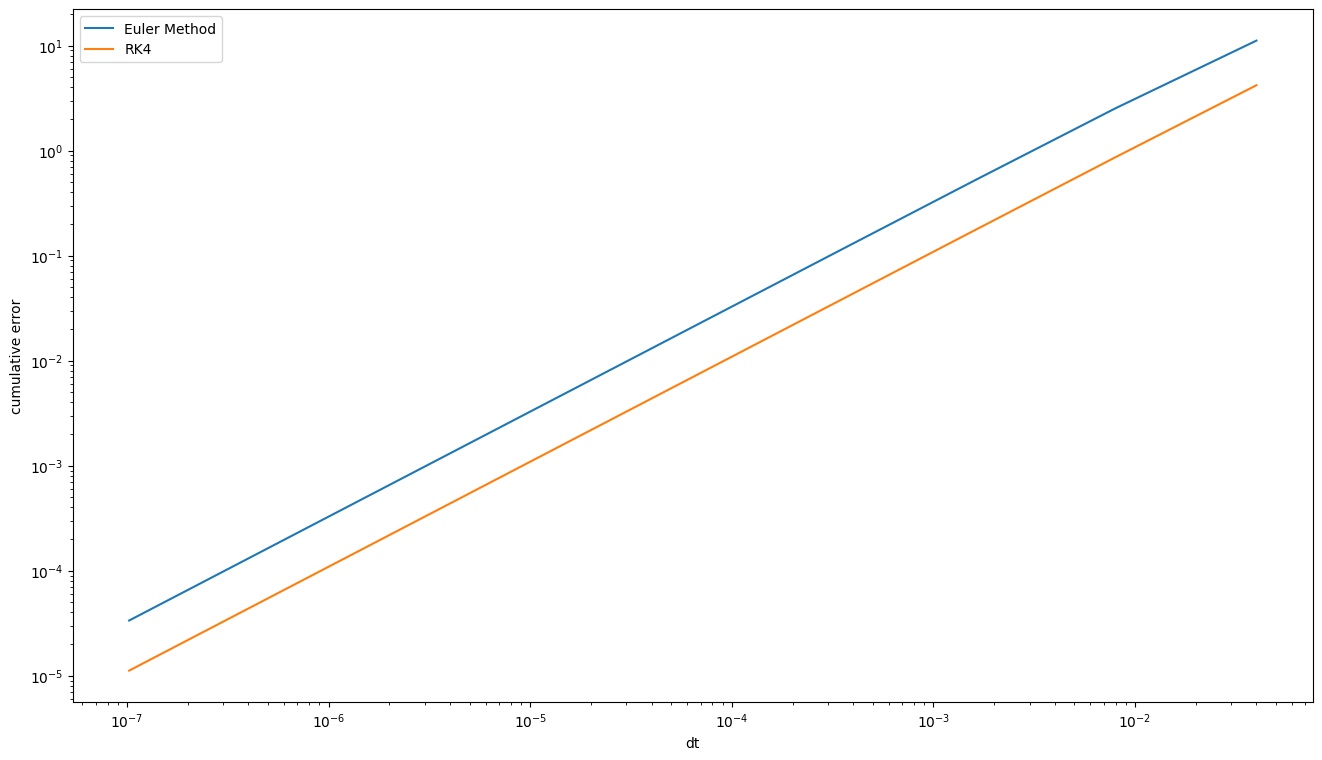

In [69]:
xa=[math.pow(0.2,i) for i in range(2,11)]
plt.figure(figsize=(16,9))
plt.plot(xa,df['xEuler'])

plt.plot(xa,df['xRK4'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('dt')
plt.ylabel('cumulative error')
plt.legend(['Euler Method','RK4'])